In [2]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import make_blobs
from torchvision import datasets, transforms

1.26.4


# Principal Component Analysis (PCA): Theory and Applications

## Introduction

Principal Component Analysis (PCA) is one of the most fundamental techniques in data science and machine learning. It serves as a cornerstone for dimensionality reduction, data visualization, and understanding the structure of high-dimensional datasets. PCA transforms data to a lower-dimensional space while preserving as much variance (information) as possible.

At its core, PCA answers a crucial question: "What are the most important directions of variation in my data?" This question is essential when dealing with high-dimensional data where visualization is challenging, storage is expensive, or computational complexity is prohibitive.

PCA has applications across numerous fields:
- **Data Visualization**: Reducing high-dimensional data to 2D/3D for plotting
- **Data Compression**: Storing data more efficiently with minimal information loss
- **Noise Reduction**: Filtering out noise by keeping only major components
- **Feature Engineering**: Creating new features that capture data structure
- **Exploratory Data Analysis**: Understanding patterns and relationships in data

## Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand** the mathematical foundations of PCA and eigenvalue decomposition
2. **Derive** the PCA algorithm from variance maximization principles
3. **Implement** PCA from scratch using eigendecomposition
4. **Interpret** principal components as directions of maximum variance
5. **Analyze** the trade-off between dimensionality reduction and information retention
6. **Apply** PCA to real-world datasets (synthetic and MNIST)
7. **Evaluate** PCA results using reconstruction error and explained variance
8. **Connect** PCA to linear algebra concepts (covariance, eigenvectors, projections)

## Theoretical Background

### The Variance Maximization Problem

PCA finds the directions in which data varies the most. Mathematically, given data matrix $X \in \mathbb{R}^{n \times p}$ (n samples, p features), we want to find a unit vector $v \in \mathbb{R}^p$ such that the variance of the projected data $Xv$ is maximized.

**Optimization Problem:**
$$\max_{v} \text{Var}(Xv) \quad \text{subject to} \quad ||v|| = 1$$

### Mathematical Derivation

For centered data (mean-subtracted), the variance of projected data is:
$$\text{Var}(Xv) = \frac{1}{n-1} ||Xv||^2 = \frac{1}{n-1} v^T X^T X v = v^T \Sigma v$$

where $\Sigma = \frac{1}{n-1} X^T X$ is the sample covariance matrix.

**Lagrangian Solution:**
$$L = v^T \Sigma v - \lambda (v^T v - 1)$$

Taking derivatives and setting to zero:
$$\frac{\partial L}{\partial v} = 2\Sigma v - 2\lambda v = 0$$

This gives us the **eigenvalue equation**:
$$\Sigma v = \lambda v$$

### Key Results

1. **Principal Components**: Eigenvectors of the covariance matrix
2. **Explained Variance**: Eigenvalues represent variance along each principal component
3. **Optimal Projection**: PCA provides the best linear dimensionality reduction in terms of preserved variance

### Properties of PCA

- **Orthogonal Components**: Principal components are mutually orthogonal
- **Decreasing Variance**: Components are ordered by decreasing eigenvalues
- **Linear Transformation**: PCA is a linear transformation of the original data
- **Reversible**: Can reconstruct original data (with some loss if dimensions are reduced)

---

## Implementation from First Principles

## Example 1: Understanding PCA with 2D Correlated Data

Let's start with a simple 2D example to build intuition about what PCA does.

### Understanding the Data Generation Process

We're generating data from a **multivariate normal distribution** with:
- **Mean**: $\mu = [5, -2]$
- **Covariance**: $\Sigma = \begin{bmatrix} 1.0 & 0.7 \\ 0.7 & 1.0 \end{bmatrix}$

The correlation coefficient is 0.7, meaning the variables are positively correlated. This creates an elliptical data cloud tilted along the correlation direction.

### Step 1: Data Centering

**Why center the data?** PCA finds directions of maximum variance from the origin. If data isn't centered, the first principal component might just point toward the data mean rather than capturing the true variance structure.

**Interpretation:**
- **Original data**: Centered around [5, -2] with elliptical spread
- **Centered data**: Now centered at origin [0, 0], preserving the variance structure
- **Red point**: Original mean, **Blue point**: Centered mean (at origin)

Centering doesn't change the relative positions of data points, just shifts the entire dataset.

### Step 2: Computing the Covariance Matrix

The covariance matrix captures how variables co-vary. For centered data:

$$\Sigma = \frac{1}{n-1} X^T X$$

where each element $\Sigma_{ij} = \text{Cov}(X_i, X_j)$.

**Understanding the Covariance Matrix:**
- **Diagonal elements**: Variances of individual variables
- **Off-diagonal elements**: Covariances between variables
- **Positive covariance (0.729)**: Variables tend to increase/decrease together
- **Nearly symmetric**: $\text{Cov}(X_1, X_2) = \text{Cov}(X_2, X_1)$

### Step 3: Eigenvalue Decomposition

The heart of PCA lies in decomposing the covariance matrix:

$$\Sigma v = \lambda v$$

**Physical Interpretation:**
- **Eigenvectors (v)**: Directions of principal axes
- **Eigenvalues (λ)**: Amount of variance along each principal axis

**Key Insights:**

1. **First Principal Component (PC1)**: 
   - Direction: [0.695, 0.719] (roughly 45° angle, pointing up-right)
   - Variance: 1.78 (captures most variation)
   - This aligns with the major axis of the elliptical data cloud

2. **Second Principal Component (PC2)**:
   - Direction: [-0.719, 0.695] (perpendicular to PC1)
   - Variance: 0.32 (captures remaining variation)
   - This aligns with the minor axis of the ellipse

3. **Orthogonality**: PC1 and PC2 are perpendicular (dot product ≈ 0)

The eigenvectors show us the natural coordinate system of our data!

### Step 4: Projection and Reconstruction

**Projection**: Transform data to principal component space
$$Y = X_{\text{centered}} V$$

**Reconstruction**: Transform back to original space
$$X_{\text{reconstructed}} = Y V^T$$

For 1D PCA, we only use the first principal component:

**Understanding the Results:**

1. **Projection Formula**: $y_i = \mathbf{x}_i^T \mathbf{v}_1$ (dot product of data point with first eigenvector)

2. **Reconstruction Formula**: $\hat{\mathbf{x}}_i = y_i \mathbf{v}_1$ (scale the eigenvector by the projection)

3. **Geometric Interpretation**: Each point is projected onto the line defined by the first principal component, then reconstructed back to 2D space

4. **Information Loss**: The distance between original and reconstructed points represents lost information (captured by PC2)

The reconstruction shows how well a 1D representation captures the 2D data structure!

In [20]:
# Simple 2D blobs with say 0.7 correlation
X = torch.distributions.multivariate_normal.MultivariateNormal(
    torch.tensor([5.0, -2.0]), torch.tensor([[1.0, 0.7], [0.7, 1.0]])
).sample((1000,))

In [ ]:
# Comprehensive PCA visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Original vs Centered Data
axes[0, 0].scatter(X[:, 0], X[:, 1], alpha=0.6, s=30, label='Original Data')
axes[0, 0].scatter(X_mean[0, 0], X_mean[0, 1], color='red', s=100, marker='x', 
                  linewidth=3, label='Original Mean')
axes[0, 0].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, s=30, 
                  color='orange', label='Centered Data')
axes[0, 0].scatter(0, 0, color='blue', s=100, marker='x', linewidth=3, 
                  label='Centered Mean')
axes[0, 0].set_title('Data Centering')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axis('equal')

# 2. Covariance Matrix Visualization
im = axes[0, 1].imshow(cov.numpy(), cmap='coolwarm', vmin=-1, vmax=1)
axes[0, 1].set_title('Covariance Matrix')
for i in range(2):
    for j in range(2):
        axes[0, 1].text(j, i, f'{cov[i,j]:.3f}', ha='center', va='center', 
                       fontsize=12, fontweight='bold')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_yticks([0, 1])
axes[0, 1].set_xticklabels(['X1', 'X2'])
axes[0, 1].set_yticklabels(['X1', 'X2'])
plt.colorbar(im, ax=axes[0, 1])

# 3. Eigendecomposition Results
axes[0, 2].bar(['PC1', 'PC2'], eigvals.numpy(), alpha=0.7, color=['blue', 'red'])
axes[0, 2].set_title('Eigenvalues (Explained Variance)')
axes[0, 2].set_ylabel('Variance')
for i, val in enumerate(eigvals.numpy()):
    axes[0, 2].text(i, val + 0.02, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Principal Components Visualization
axes[1, 0].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, s=30, color='lightblue')

# Plot eigenvectors as arrows from origin
scale = 2  # Scale for visibility
for i in range(2):
    vec = eigvecs[:, i] * scale
    axes[1, 0].arrow(0, 0, vec[0], vec[1], head_width=0.1, head_length=0.1, 
                    fc=f'C{i}', ec=f'C{i}', linewidth=3, 
                    label=f'PC{i+1} (λ={eigvals[i]:.3f})')

axes[1, 0].set_title('Principal Components\n(Eigenvectors)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axis('equal')

# 5. 1D Projection
axes[1, 1].scatter(X_proj_1d[:, 0], X_proj_1d[:, 1], alpha=0.8, s=30, 
                  color='red', label='1D Projection')
axes[1, 1].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3, s=20, 
                  color='lightblue', label='Original Data')

# Draw projection lines
for i in range(0, len(X_centered), 20):  # Show every 20th line for clarity
    x_orig = X_centered[i]
    x_proj = X_proj_1d[i]
    axes[1, 1].plot([x_orig[0], x_proj[0]], [x_orig[1], x_proj[1]], 
                   'k--', alpha=0.3, linewidth=0.5)

axes[1, 1].set_title('1D PCA Reconstruction')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axis('equal')

# 6. Explained Variance Analysis
explained_var_ratio = eigvals / torch.sum(eigvals)
cumulative_var = torch.cumsum(explained_var_ratio, dim=0)

x_pos = np.arange(len(eigvals))
bars = axes[1, 2].bar(x_pos, explained_var_ratio.numpy(), alpha=0.7, label='Individual')
axes[1, 2].plot(x_pos, cumulative_var.numpy(), 'ro-', linewidth=2, markersize=8, label='Cumulative')

axes[1, 2].set_title('Explained Variance Ratio')
axes[1, 2].set_xlabel('Principal Component')
axes[1, 2].set_ylabel('Proportion of Variance')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels(['PC1', 'PC2'])
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# Add percentage labels
for i, (ind, cum) in enumerate(zip(explained_var_ratio.numpy(), cumulative_var.numpy())):
    axes[1, 2].text(i, ind + 0.02, f'{ind:.1%}', ha='center', va='bottom', fontweight='bold')
    axes[1, 2].text(i, cum + 0.02, f'{cum:.1%}', ha='center', va='bottom', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Detailed Analysis
print("COMPREHENSIVE PCA ANALYSIS:")
print("="*50)

print(f"\n1. DATA CHARACTERISTICS:")
print(f"   - Original mean: [{X_mean[0, 0]:.3f}, {X_mean[0, 1]:.3f}]")
print(f"   - Data shape: {X.shape}")
print(f"   - Correlation: {cov[0,1] / torch.sqrt(cov[0,0] * cov[1,1]):.3f}")

print(f"\n2. COVARIANCE MATRIX:")
print(f"   - Var(X1): {cov[0,0]:.3f}")
print(f"   - Var(X2): {cov[1,1]:.3f}")
print(f"   - Cov(X1,X2): {cov[0,1]:.3f}")
print(f"   - Total variance: {torch.trace(cov):.3f}")

print(f"\n3. EIGENDECOMPOSITION:")
print(f"   - Eigenvalues: {eigvals.numpy()}")
print(f"   - PC1 direction: [{eigvecs[0,0]:.3f}, {eigvecs[1,0]:.3f}]")
print(f"   - PC2 direction: [{eigvecs[0,1]:.3f}, {eigvecs[1,1]:.3f}]")
print(f"   - Orthogonality check: {torch.dot(eigvecs[:,0], eigvecs[:,1]):.6f}")

print(f"\n4. VARIANCE EXPLANATION:")
print(f"   - PC1 explains: {explained_var_ratio[0]:.1%} of variance")
print(f"   - PC2 explains: {explained_var_ratio[1]:.1%} of variance")
print(f"   - Total explained: {cumulative_var[-1]:.1%}")

print(f"\n5. RECONSTRUCTION QUALITY:")
reconstruction_error = torch.mean((X_centered - X_proj_1d)**2)
print(f"   - Mean Squared Error (1D): {reconstruction_error:.6f}")
print(f"   - Variance retained (1D): {explained_var_ratio[0]:.1%}")
print(f"   - Information lost (1D): {explained_var_ratio[1]:.1%}")

## Example 2: PCA on High-Dimensional Data (MNIST)

Now let's apply PCA to a real-world high-dimensional dataset: handwritten digits from MNIST. This demonstrates PCA's power in reducing dimensionality while preserving essential information.

**Understanding MNIST in PCA Context:**

- **Original Dimensionality**: 784 dimensions (28×28 pixels)
- **Sample Size**: 1000 images (subset for computational efficiency)
- **Challenge**: How can we capture the essence of digit shapes in far fewer dimensions?
- **PCA Goal**: Find the most important 'pixel patterns' that distinguish different digits

### Data Preprocessing and Centering

### Understanding the Covariance Structure

**Interpreting the Covariance Matrix:**

- **Size**: 784×784 matrix showing how each pixel correlates with every other pixel
- **Patterns**: 
  - Bright regions show high correlation (pixels that tend to be bright/dark together)
  - Block-like structure suggests spatial correlations (nearby pixels are related)
  - The pattern reveals the underlying structure of how digit pixels co-vary

### Comprehensive PCA Analysis with Visualizations

Let's create a complete visualization showing all aspects of PCA:

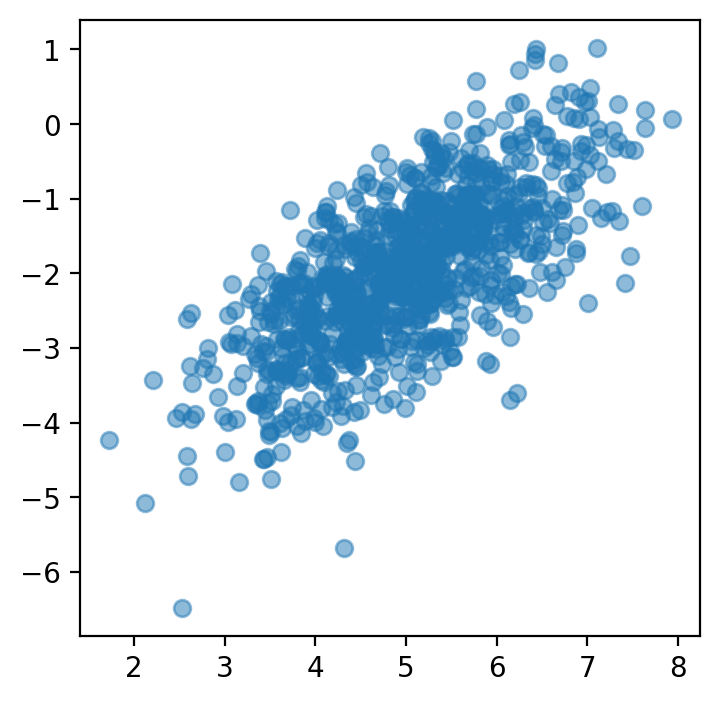

In [22]:
### Plot the data
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1],  alpha=0.5)

### Principal Components as 'Eigendigits'

The principal components can be interpreted as fundamental 'building blocks' or 'eigendigits' - basic patterns that combine to form all digit images.

**Understanding Principal Components:**

Each principal component represents a different pattern of pixel variations:

- **PC1**: Captures the most common variation (average brightness vs. background)
- **PC2-PC4**: Capture shape variations (edges, curves, strokes)
- **Higher PCs**: Capture more subtle details and noise

These components are like 'visual features' that the human visual system might use to recognize digits!

### Dimensionality Reduction and Reconstruction Quality

**Key Observations:**

1. **Dramatic Dimensionality Reduction**: Even 10 components (1.3% of original dimensions) capture recognizable digit structure

2. **Quality vs. Compression Trade-off**: 
   - 2 components: ~25% variance, basic shape visible
   - 10 components: ~60% variance, clearly recognizable digits
   - 50 components: ~85% variance, high-quality reconstruction

3. **Diminishing Returns**: Adding more components improves quality, but with decreasing benefit

4. **Storage Efficiency**: Instead of storing 784 values per image, we can store just 10-50 principal component coefficients!

---

## Summary and Key Takeaways

### Mathematical Foundations:

1. **Core Principle**: PCA finds orthogonal directions of maximum variance through eigendecomposition of the covariance matrix

2. **Optimization**: Solves $\max_v v^T \Sigma v$ subject to $||v|| = 1$, yielding $\Sigma v = \lambda v$

3. **Geometric Interpretation**: Rotates coordinate system to align with natural axes of data variation

### Practical Insights:

1. **Dimensionality Reduction**: Often 90%+ of variance captured by small fraction of dimensions
2. **Data Compression**: Store only principal component coefficients instead of raw features  
3. **Noise Reduction**: Lower components often represent noise; keeping top components filters this out
4. **Feature Engineering**: PC scores can serve as new features for machine learning

### Key Properties:

- **Linear Transformation**: $Y = XW$ where W contains eigenvectors
- **Orthogonal Components**: Principal components are uncorrelated
- **Variance Ordering**: Components ordered by decreasing explained variance
- **Reconstruction**: $\hat{X} = YW^T$ (perfect if all components kept)

### Applications and Extensions:

**Direct Applications:**
- Data visualization (reduce to 2D/3D)
- Image compression and denoising
- Exploratory data analysis
- Preprocessing for machine learning

**Connections to Other Methods:**
- **Factor Analysis**: PCA without noise assumptions
- **Independent Component Analysis (ICA)**: Non-orthogonal components
- **t-SNE/UMAP**: Nonlinear dimensionality reduction
- **Autoencoders**: Neural network-based dimensionality reduction

### When to Use PCA:

**Good Cases:**
- High-dimensional data with linear correlations
- Need for interpretable dimensions
- Data visualization requirements
- Computational efficiency important

**Limitations:**
- Assumes linear relationships
- Components may not be interpretable
- Sensitive to scaling of features
- May not preserve local structure

### Best Practices:

1. **Always center data** (subtract mean)
2. **Consider scaling** features if different units
3. **Choose components** based on explained variance and domain knowledge
4. **Validate reconstruction quality** for your specific use case
5. **Compare with other dimensionality reduction** methods

Understanding PCA provides a solid foundation for advanced topics in machine learning, computer vision, and data science. It bridges linear algebra theory with practical data analysis, making it an essential tool in the data scientist's toolkit.

### Center the data

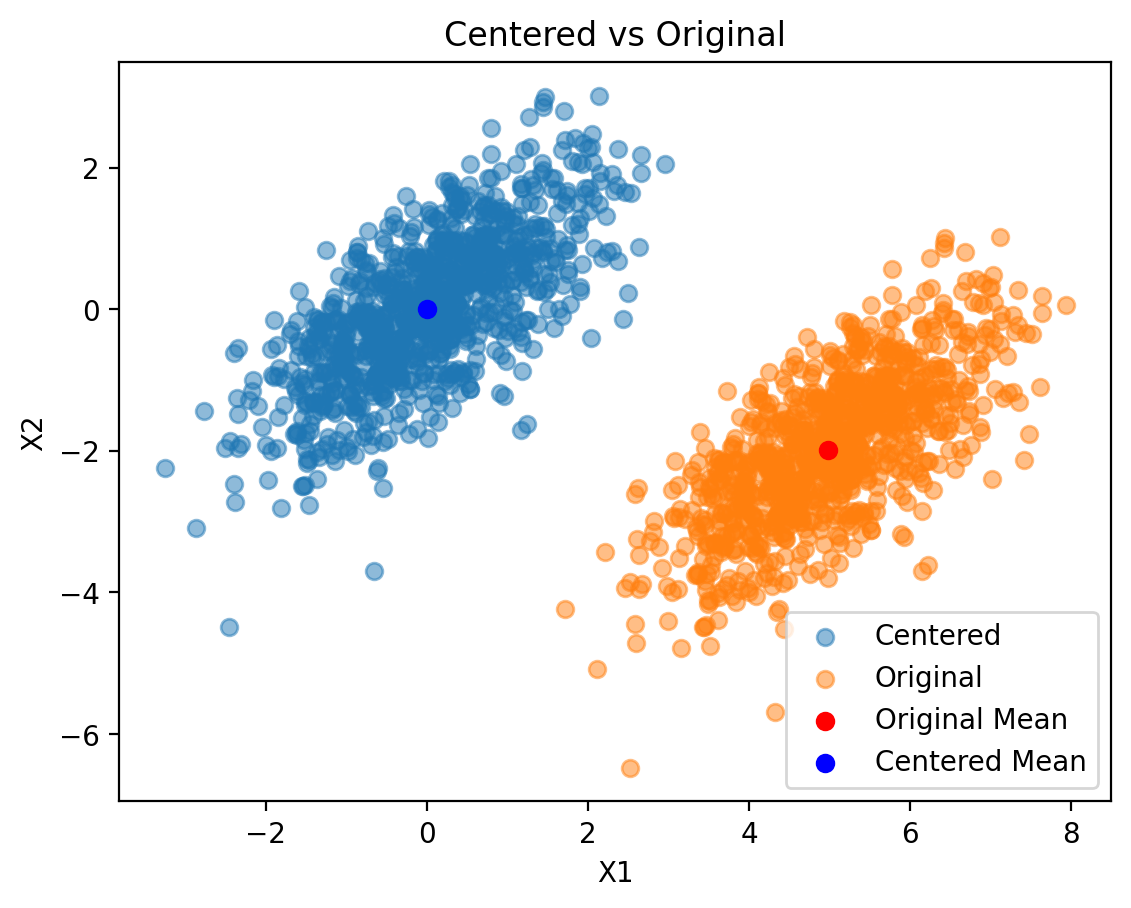

In [23]:
X_mean = X.mean(0, keepdim=True)
X_centered = X - X_mean

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='Centered')
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original')
plt.scatter(X_mean[:, 0], X_mean[:, 1], color='red', label='Original Mean')
plt.scatter(X_centered.mean(0, keepdim=True)[:, 0], X_centered.mean(0, keepdim=True)[:, 1], color='blue', label='Centered Mean')
plt.title('Centered vs Original')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

### Finding covariance

In [24]:
cov = X_centered.T @ X_centered / (X.shape[0] - 1)
print('Covariance matrix:')
print(cov)

Covariance matrix:
tensor([[1.0229, 0.7291],
        [0.7291, 1.0733]])


In [25]:
### Finding the eigenvalues and eigenvectors
eigvals, eigvecs = torch.linalg.eigh(cov)
print('Eigenvalues:')
print(eigvals)
print('Eigenvectors:')
print(eigvecs)

Eigenvalues:
tensor([0.3186, 1.7776])
Eigenvectors:
tensor([[-0.7192,  0.6948],
        [ 0.6948,  0.7192]])


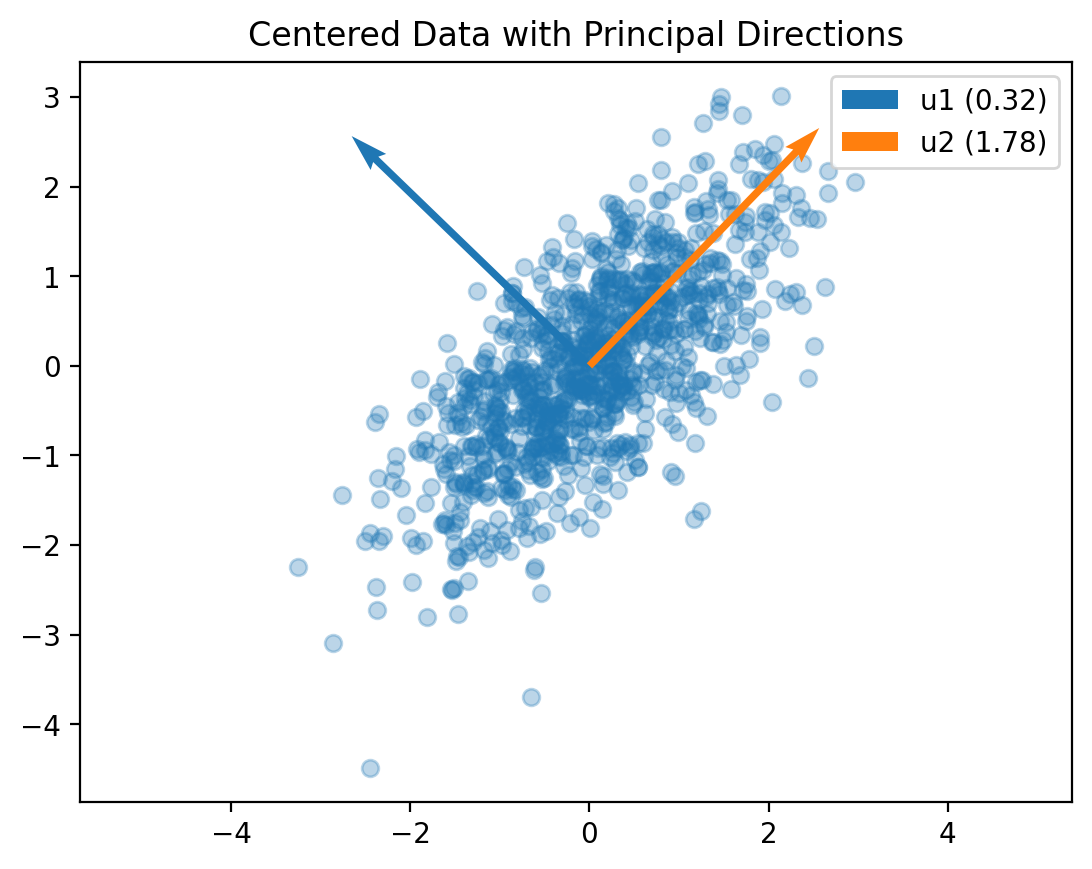

In [26]:
# Plot centered data with eigenvectors
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)

# Plot eigenvectors starting from the mean
for i in range(2):
    vec = eigvecs[:, i]
    plt.quiver(0, 0, vec[0], vec[1], scale=3, color=f"C{i}", label=f"u{i+1} ({eigvals[i]:.2f})")

plt.axis('equal')
plt.legend()
plt.title("Centered Data with Principal Directions")
plt.show()


In [29]:
top_vec = eigvecs[:, -1]  # Last column of eigvecs (the top eigenvector)
print('Top eigenvector:')
print(top_vec)


Top eigenvector:
tensor([0.6948, 0.7192])


In [36]:
# Project centered data onto the top eigenvector using dot product
X_proj = torch.zeros_like(X_centered)  # Initialize an empty tensor to store projections

# Loop through each data point and project it onto the top eigenvector
for i in range(X_centered.shape[0]):
    # Calculate the projection of the i-th data point onto the top eigenvector
    X_proj[i] = torch.dot(X_centered[i], top_vec) * top_vec  # Scalar projection * eigenvector

# Reconstruct the data by adding the mean back
X_recon = X_proj + X_mean

In [37]:
X_recon

tensor([[ 2.8117, -4.2273],
        [ 4.4202, -2.5621],
        [ 5.5191, -1.4246],
        ...,
        [ 4.1834, -2.8073],
        [ 3.9091, -3.0913],
        [ 5.5841, -1.3573]])

Text(0.5, 1.0, 'PCA projection onto top component')

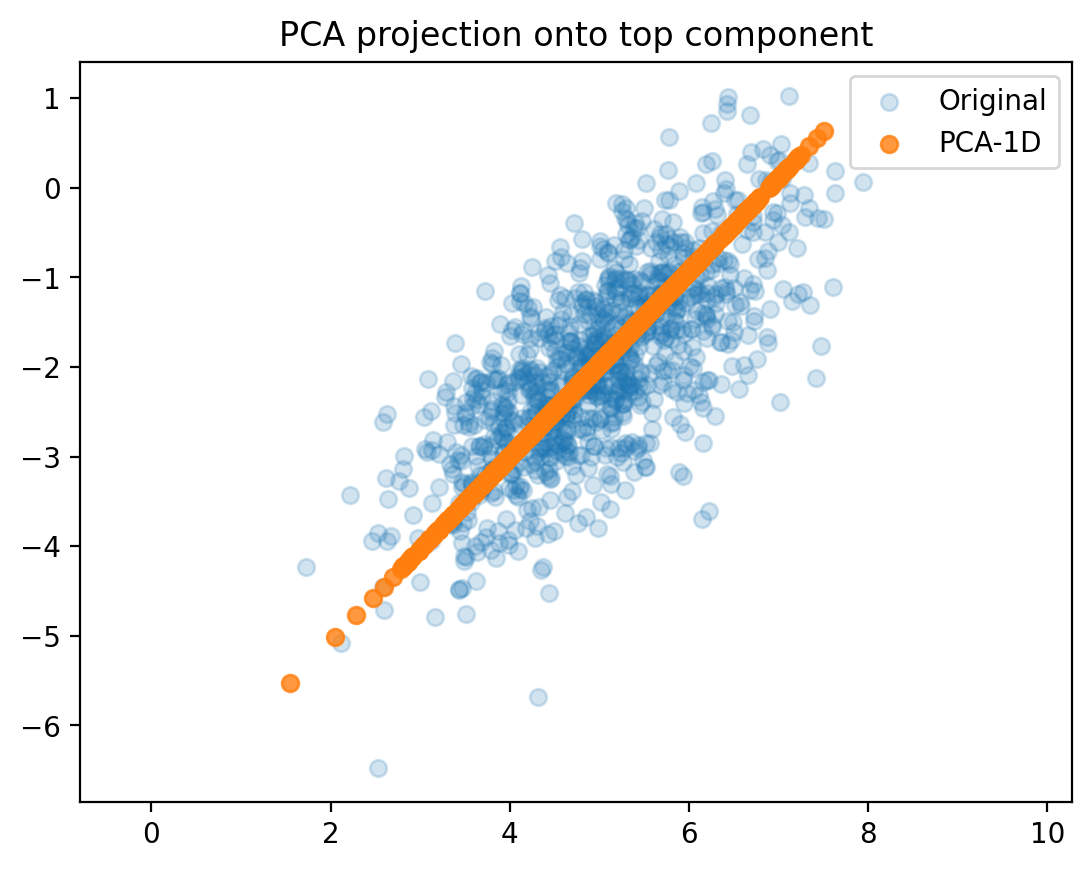

In [38]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label='Original')
plt.scatter(X_recon[:, 0], X_recon[:, 1], alpha=0.8, label='PCA-1D')
plt.axis('equal')
plt.legend()
plt.title("PCA projection onto top component")

In [58]:
# Load MNIST dataset
import torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_data = torchvision.datasets.MNIST(root='~/.data', train=True, download=True, transform=transform)

# Take a small subset of data for simplicity
X = train_data.data[:1000].float()  # Take the first 1000 images (28x28 pixels)
y = train_data.targets[:1000]  # Corresponding labels

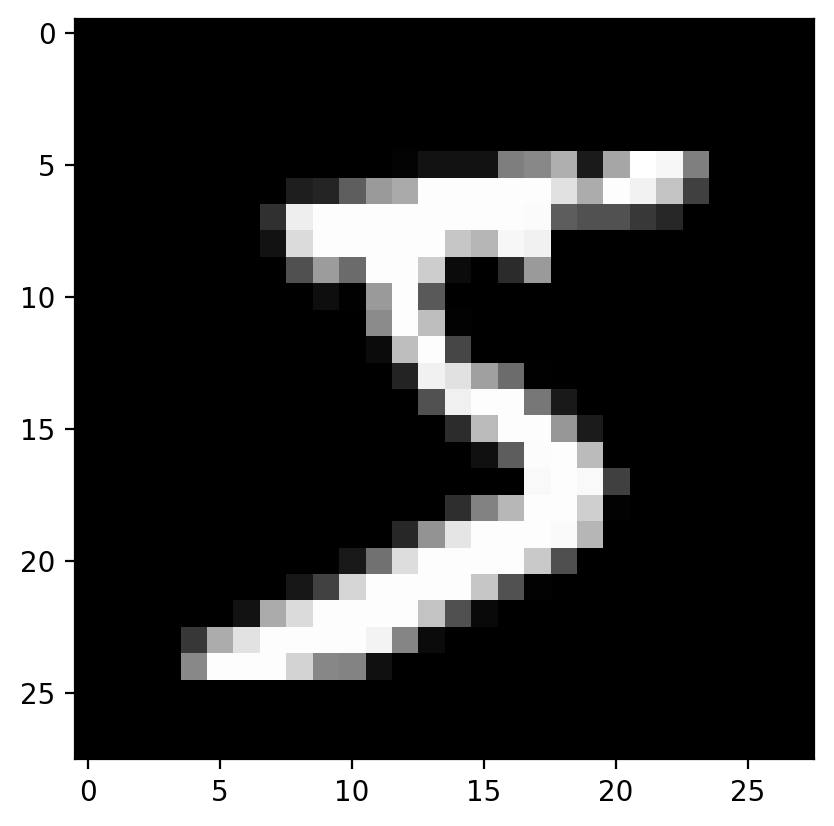

In [40]:
# View the first image
plt.imshow(X[0].reshape(28, 28), cmap='gray')

In [41]:
X = X / 255.0  # Normalize to [0, 1]
X_centered = X - X.mean(dim=0)  # Center the data by subtracting the mean

In [46]:
X_vecs = X_centered.reshape(X_centered.shape[0], -1)  # Reshape to (n_samples, n_features)

In [47]:
# Compute covariance matrix
cov_matrix = torch.cov(X_vecs.T)  # Transpose to get (n_features, n_samples)


In [48]:
print('Covariance matrix shape:', cov_matrix.shape)


Covariance matrix shape: torch.Size([784, 784])


Text(0.5, 1.0, 'Covariance Matrix')

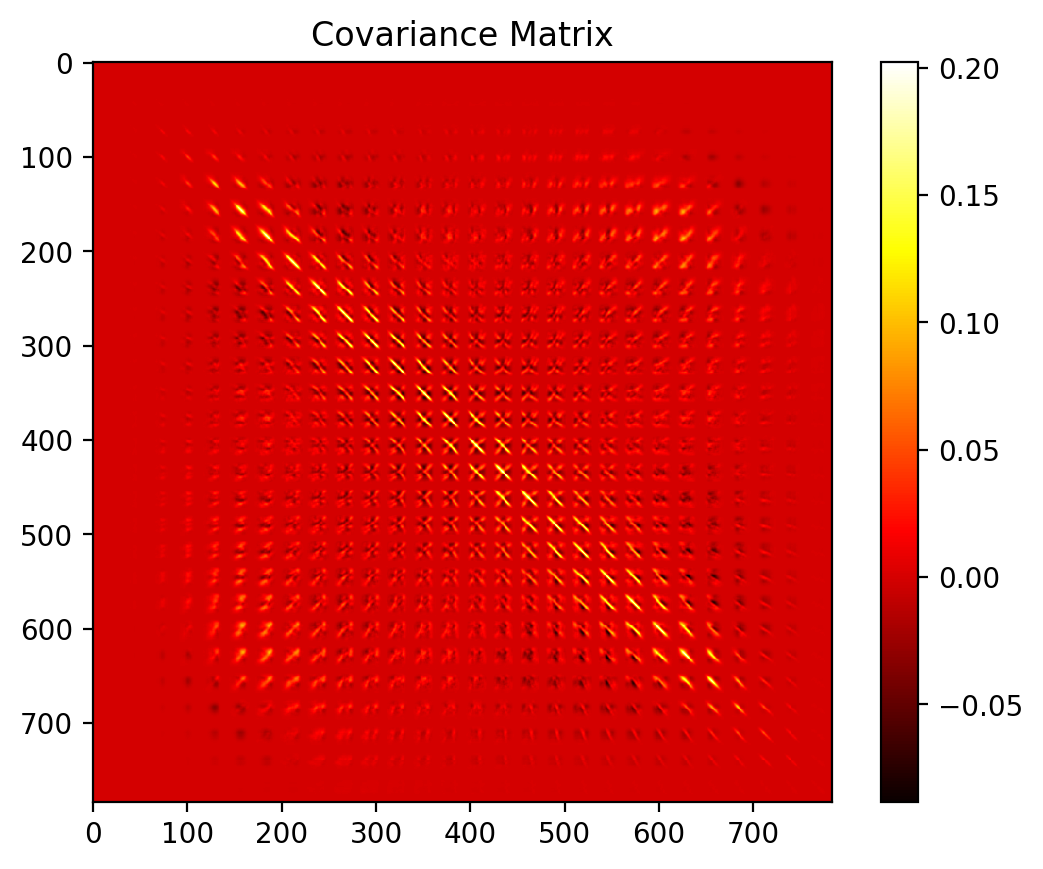

In [50]:
plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix')

In [51]:
# Eigenvalue decomposition
eigvals, eigvecs = torch.linalg.eigh(cov_matrix)
print('Eigenvalues shape:', eigvals.shape)

Eigenvalues shape: torch.Size([784])


Top K eigenvalues: tensor([5.1288, 4.0052, 3.5313, 2.8018, 2.5156, 2.3427, 1.8130, 1.5647, 1.4760,
        1.1167])
Top K eigenvectors shape: torch.Size([784, 10])


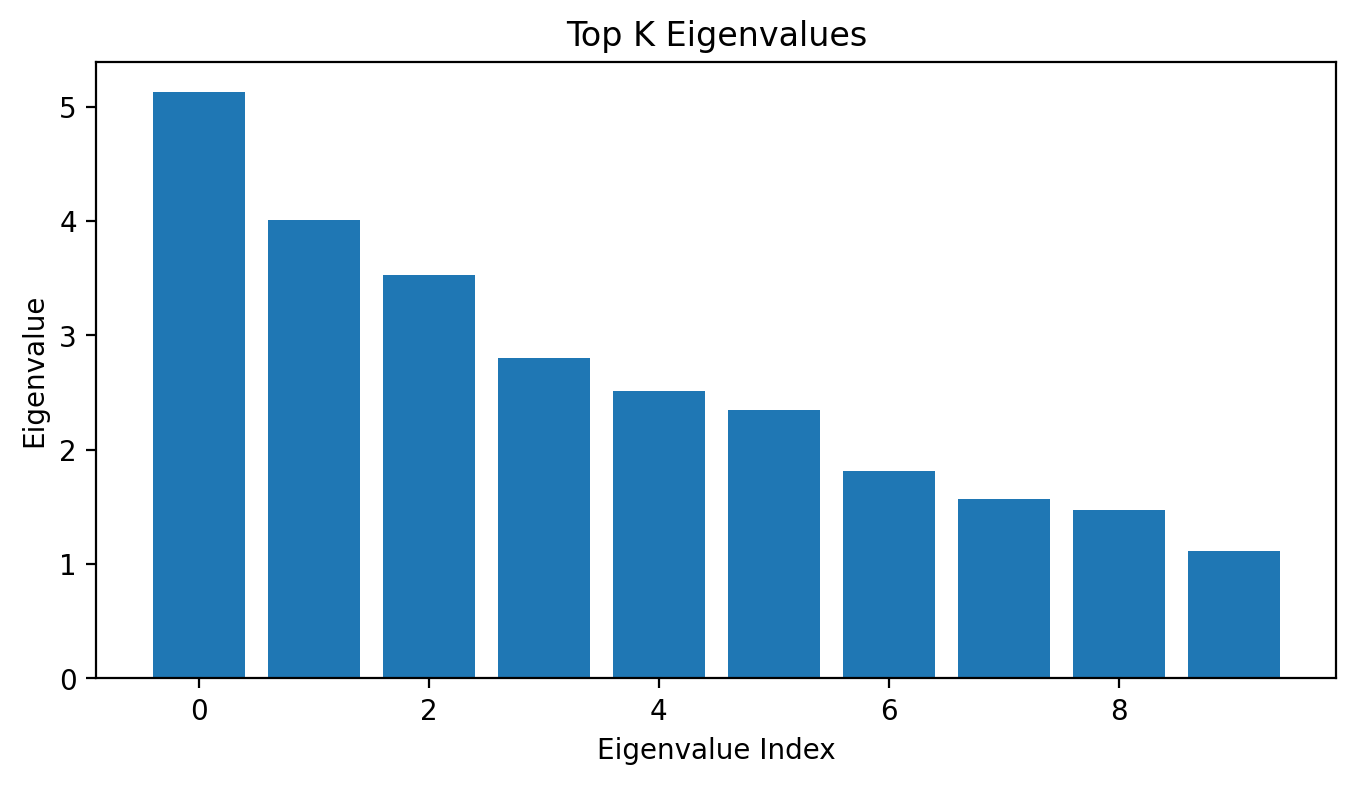

In [52]:
# Top K eigenvalues and eigenvectors
K = 10
top_k_eigvals, top_k_indices = torch.topk(eigvals, K)
top_k_eigvecs = eigvecs[:, top_k_indices]
print('Top K eigenvalues:', top_k_eigvals)
print('Top K eigenvectors shape:', top_k_eigvecs.shape)
# Plot the top K eigenvalues
plt.figure(figsize=(8, 4))
plt.bar(range(K), top_k_eigvals.numpy())
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Top K Eigenvalues')
plt.show()

In [53]:
# Project data onto the top K eigenvectors
X_proj = torch.matmul(X_vecs, top_k_eigvecs)
print('Projected data shape:', X_proj.shape)
# Reconstruct the data from the top K components

Projected data shape: torch.Size([1000, 10])


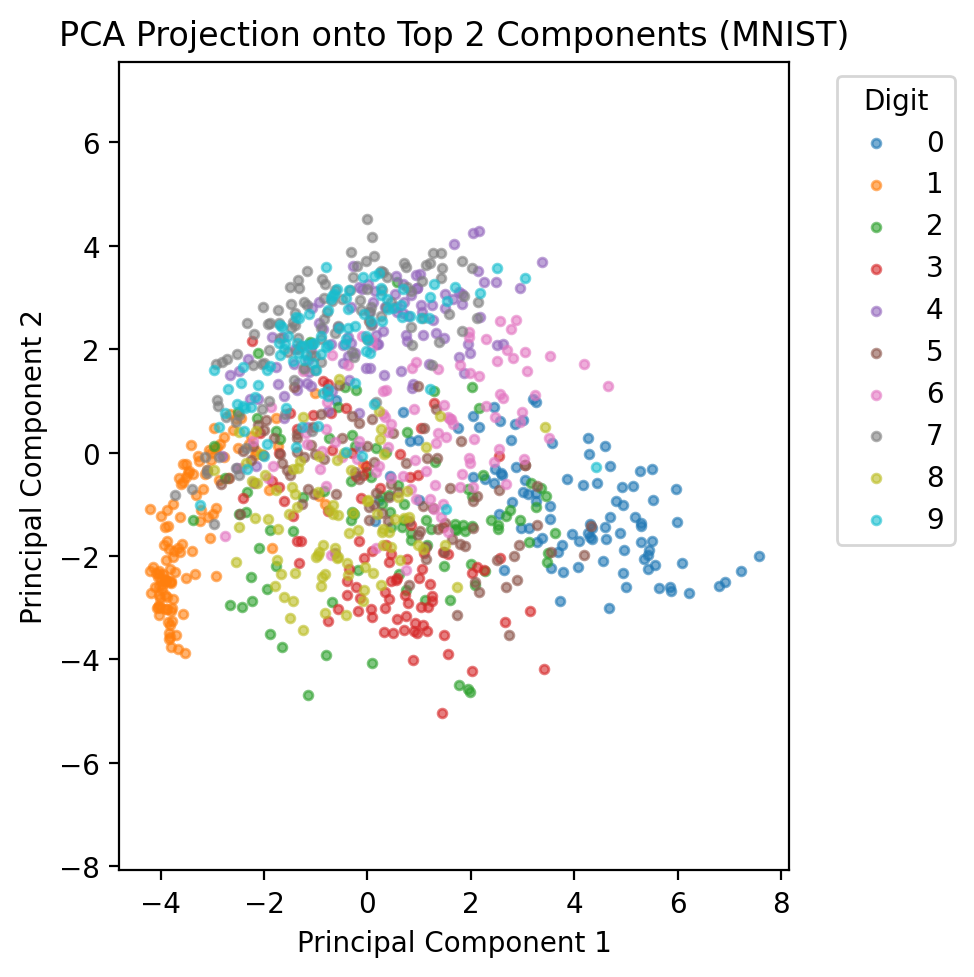

In [61]:
import matplotlib.cm as cm

plt.figure(figsize=(5, 5))

colors = cm.tab10(np.arange(10))  # 10 distinct colors
for i in range(10):
    idx = (y == i)
    plt.scatter(X_proj[idx, 0], X_proj[idx, 1], 
                alpha=0.6, color=colors[i], label=f"{i}", s=10)

plt.title('PCA Projection onto Top 2 Components (MNIST)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axis('equal')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()